**A character-level RNN reads words as a series of characters - outputting a prediction and “hidden state” at each step, feeding its previous hidden state into each next step. We take the final prediction to be the output, i.e. which class the word belongs to.**

[Pytorch Tutorial on Character Level RNN](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)

In [52]:
from __future__ import unicode_literals, division, print_function
from io import open
import glob
import os
import time
import math
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def find_files(path):
    return glob.glob(path)

find_files("names/*.txt")

['names/Czech.txt',
 'names/German.txt',
 'names/Arabic.txt',
 'names/Japanese.txt',
 'names/Chinese.txt',
 'names/Vietnamese.txt',
 'names/Russian.txt',
 'names/French.txt',
 'names/Irish.txt',
 'names/English.txt',
 'names/Spanish.txt',
 'names/Greek.txt',
 'names/Italian.txt',
 'names/Portuguese.txt',
 'names/Scottish.txt',
 'names/Dutch.txt',
 'names/Korean.txt',
 'names/Polish.txt']

In [3]:
import unicodedata
import string

In [4]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [5]:
def unicodeToAscii(s):
    return ''.join(
    c for c in unicodedata.normalize('NFD',s)
    if  unicodedata.category(c) != 'Mn'
    and  c in all_letters)

In [6]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [7]:
category_lines = {}
all_category = []

In [8]:
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split("\n")
    return [unicodeToAscii(line) for line in lines]

In [9]:
for filename in find_files("names/*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_category.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
    
n_categories = len(all_category)

In [10]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [11]:
def letterToIndex(letter):
    return all_letters.find(letter)

In [12]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

In [13]:
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
        
    return tensor

In [14]:
print(letterToTensor('J'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [15]:
print(lineToTensor('Jones').size())

torch.Size([5, 1, 57])


In [37]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN,self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, inputs, hidden):
        combined = torch.cat((inputs, hidden),1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [38]:
inputs = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(inputs, hidden)

In [39]:
output.size() # 18 categories

torch.Size([1, 18])

In [40]:
next_hidden.size()

torch.Size([1, 128])

In [41]:
inputs = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inputs[0], hidden)
print(output.size())

torch.Size([1, 18])


In [42]:
inputs[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [43]:
next_hidden

tensor([[ 0.0090, -0.0704,  0.0544,  0.1072,  0.0228,  0.0732, -0.0758, -0.0698,
         -0.0689, -0.0024, -0.0767,  0.0864,  0.0643,  0.0017, -0.0494,  0.0238,
         -0.0451, -0.0245, -0.0494, -0.0012,  0.0219, -0.0070,  0.0133, -0.0851,
          0.0352,  0.0242,  0.1134,  0.0630,  0.0127, -0.0223,  0.0123,  0.0108,
          0.1284,  0.0363, -0.0026, -0.0538, -0.0823, -0.1066, -0.0442,  0.0288,
         -0.0208, -0.0488, -0.0327, -0.0795,  0.0912,  0.1141,  0.1108, -0.0815,
          0.0753, -0.0011, -0.1063, -0.0031, -0.0757, -0.0270, -0.0775, -0.0903,
          0.0131,  0.0760,  0.0203,  0.1131, -0.0027, -0.0827, -0.0760,  0.0417,
         -0.0045,  0.0190,  0.0344, -0.0950,  0.0696,  0.0731,  0.0243, -0.1041,
         -0.0645, -0.0135,  0.0095, -0.0203, -0.1048, -0.0130,  0.0527, -0.0837,
         -0.0212,  0.0139,  0.0969, -0.0442,  0.0888,  0.0859, -0.0548,  0.0281,
         -0.1042, -0.0583,  0.0080,  0.0512, -0.0512, -0.0903, -0.0440,  0.0699,
          0.0286, -0.0086, -

In [44]:
#Training
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_category[category_i], category_i

categoryFromOutput(output)

('Korean', 16)

In [45]:
def randomChoice(l):
    return l[random.randint(0,len(l) - 1)]

In [46]:
def randomTrainingExample():
    category = randomChoice(all_category)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_category.index(category)],dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [47]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Polish / line = Sokolsky
category = Vietnamese / line = Trang
category = Korean / line = Byon
category = English / line = Orritt
category = Dutch / line = Oirschot
category = Korean / line = Wang
category = German / line = Schmeling
category = Dutch / line = Lauwers
category = Vietnamese / line = Lieu
category = Dutch / line = Kloet


In [48]:
criterion = nn.NLLLoss()

In [49]:
learning_rate = 0.001
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    return output, loss.item()

In [51]:
n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0 
total_loss = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m* 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters+1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        total_loss.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 11s) 2.7927 Reid / Arabic ✗ (Scottish)
10000 10% (0m 24s) 2.5744 Shizuma / Japanese ✓
15000 15% (0m 36s) 2.8022 Zhuo / Spanish ✗ (Chinese)
20000 20% (0m 48s) 2.3502 Narita / Japanese ✓
25000 25% (1m 1s) 1.9339 Ngo / Korean ✗ (Vietnamese)
30000 30% (1m 13s) 2.2447 Giang / Chinese ✗ (Vietnamese)
35000 35% (1m 24s) 2.4503 Said / Chinese ✗ (Arabic)
40000 40% (1m 35s) 1.9282 Sokolofsky / Russian ✗ (Polish)
45000 45% (1m 47s) 2.3047 Antoun / Irish ✗ (Arabic)
50000 50% (2m 0s) 2.6472 Tolkien / Dutch ✗ (German)
55000 55% (2m 11s) 1.8432 Mochan / Arabic ✗ (Irish)
60000 60% (2m 23s) 3.3532 Salazar / Irish ✗ (Portuguese)
65000 65% (2m 35s) 4.2460 Adams / Arabic ✗ (Russian)
70000 70% (2m 46s) 1.8342 Chieu / Vietnamese ✗ (Chinese)
75000 75% (2m 57s) 1.6972 Ahearn / Irish ✓
80000 80% (3m 8s) 0.2794 Yakuta / Japanese ✓
85000 85% (3m 19s) 1.5808 Rademacher / German ✓
90000 90% (3m 32s) 1.7180 Pogosyan / Irish ✗ (Russian)
95000 95% (3m 45s) 2.5787 Cham / Vietnamese ✗ (Arabic)
100000 100% (3

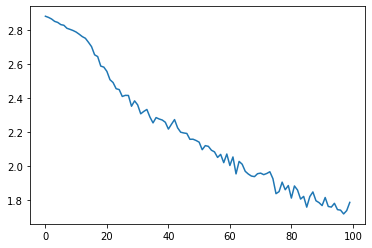

In [54]:
plt.figure()
plt.plot(total_loss)

In [60]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

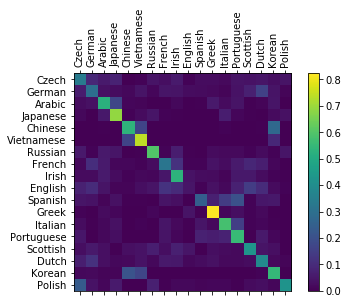

In [64]:
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_category.index(category)
    confusion[category_i][guess_i] += 1
    
# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_category, rotation=90)
ax.set_yticklabels([''] + all_category)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [65]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_category[category_index]))
            predictions.append([value, all_category[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.48) Czech
(-1.62) Russian
(-2.13) Polish

> Jackson
(-1.06) Russian
(-1.61) Scottish
(-2.36) English

> Satoshi
(-1.70) Italian
(-1.84) Polish
(-2.16) Japanese
